# Capstone Project - Car accident severity

## IBM Applied Data Science Capstone  


#### Table of Contents  



1. Business Problem

2. Data

3. Methodology

4. Results

5. Discussion

6. Recommendations


# 1. Business Problem  

Traffic Collisions are one the most common cause of human fatalities in Seattle. Consequently, this increases pressure on the public authorities to improve traffic conditions. In addition, these fatalities may lead to annual rise in insurance premium for the motorists involved in these accidents. We want to explore the Collisions dataset, from Seattle SPOT Traffic Management Division and provided by Coursera, to evaluate which characteristics or features can be used to predict accident "severity". 
The target audience is road users in Seattle and those responsible for the implementation of traffic policies in transportation division.  Our goal is to help this audience to:  

(i) Have a better transparency over the key accident “severity” drivers  

(ii) Incorporate these factors in their travel decision making process  

(iii) Act on them in order to reduce the risk of being involved in a severe accident in terms of human fatality  



# 2. Data
 
In order the explore the data, We use Jupyter notebook, pandas and numpy to load and analyse the data. Later, we will use machine learning and data science technics to develop a model to predict car accident "severity" in terms of human fatality.

The Collisions dataset consists of data on all types of collisions (e.g. Bicycle, Car, Collisions, Pedestrian) in Seattle. All collisions data are provided by SPD and recorded by Traffic Records from 2004 to Present. The data are updated on weekly basis. The current version contains 194,673 observations and 38 attributes or features

In [14]:
#loading the data
import pandas as pd
import numpy as np

df_car = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

# Diplay the first 5 rows
df_car.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [15]:
# dataset size
df_car.shape

(194673, 38)


We're going to look at these attributes to assess which ones can be used to predict car accident and assess as well the level of the severity.

In [16]:
# Features description
df_car.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

'SEVERITYCODE1': A code that corresponds to the severity of the collision:  
3—fatality
2b—serious injury
2—injury
1—prop damage
0—unknown  

 'X':
'Y':
 'OBJECTID': ESRI unique identifier
 'INCKEY': A unique key for the incident
 'COLDETKEY': Secondary key for the incident
 'REPORTNO',
       'STATUS', 'ADDRTYPE': Collision address type (Alley,Block,Intersection)
 'INTKEY': Key that corresponds to the intersection associated with a collision
 'LOCATION': Description of the general location of the Collision
 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC',
'SEVERITYDESC': A detailed description of the severity of the collision
 COLLISIONTYPE: Collision type
  PERSONCOUNT': The total number of people involved in the collision
PEDCOUNT: The number of pedestrians involved in the collision. This is entered by the state.
PEDCYLCOUNT : The number of bicycles involved in the collision.
This is entered by the state. 
VEHCOUNT : The number of vehicles involved in the collision.
This is entered by the state.
INCDATE : The date of the incident.
 INCDTTM : The date and time of the incident.
JUNCTIONTYPE : Category of junction at which collision took
place 
SDOT_COLCODE : A code given to the collision by SDOT.
 SDOT_COLDESC : A description of the collision corresponding to
the collision code.
  INATTENTIONIND : Whether or not collision was due to inattention.
(Y/N)
 UNDERINFL : Whether or not a driver involved was under the
influence of drugs or alcohol. 
WEATHER : A description of the weather conditions during
the time of the collision. 
ROADCOND : The condition of the road during the collision.
LIGHTCOND : The light conditions during the collision.
PEDROWNOTGRNT : Whether or not the pedestrian right of way was
not granted. (Y/N)
SDOTCOLNUM : A number given to the collision by SDOT. 
SPEEDING : Whether or not speeding was a factor in the
collision. (Y/N)
ST_COLCODE : A code provided by the state that describes the
collision. For more information about these codes, please see the State Collision Code
Dictionary. 
ST_COLDESC : A description that corresponds to the state’s
coding designation.
 SEGLANEKEY: A key for the lane segment in which the collision
occurred. 
CROSSWALKKEY : A key for the crosswalk at which the collision
occurred. 
HITPARKEDCAR : Whether or not the collision involved hitting a
parked car. (Y/N)






As you can see in the above variable description, many of them provide information post-accident. They cannot really be used as accident cause. For example, COLLISIONTYPE, PERSONCOUNT etc. We will drop these variables from the dataset and all other similar variables  

Given that our goal is to determine the key factors that cause collisions and the level of severity, we will extract, for example, the following features, as predictor variables: weather conditions, road conditions, speeding, light conditions as they seem to have more potential to cause accident.   

As for accident severity, in terms of human fatality, we will use the severity (SEVERITYCODE) as dependent variable or target. For example, a code of 3 is assigned to accident classified as “fatal” while a code of 2 is assigned to accident with “injury”.

Hence, we end up with new dataframe with 194,673observations and 8 attributes as per below

In [29]:
df_carNew = df_car[['SEVERITYCODE','ADDRTYPE','INATTENTIONIND', 'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
df_carNew

,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,NaN,0,Raining,Wet,Daylight,NaN
...,...,...,...,...,...,...,...,...
194668,2,Block,NaN,N,Clear,Dry,Daylight,NaN
194669,1,Block,Y,N,Raining,Wet,Daylight,NaN
194670,2,Intersection,NaN,N,Clear,Dry,Daylight,NaN
194671,2,Intersection,NaN,N,Clear,Dry,Dusk,NaN


The dataset contains also several missing values, as per below.  We will identify these missing values and explore later different methods to handle them (remove or replace them). 

In [22]:
# Identy the number of missing values.
df_carNew.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

Moreover, as per below, we can see that most of the variables are categorical variables. As such, it is not possible to use regression. Therefore, later this in this project, we will use graphical analysis, by using matplotlib and seaborn; and other statistical technics to analyse correlation between these features and the target variable. 

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='ADDRTYPE'>

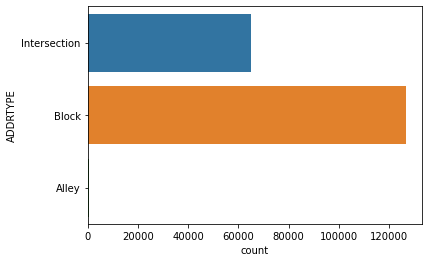

In [28]:
sns.countplot(y=df_carNew['ADDRTYPE'],data=df_carNew)

In [25]:
dummy_variable_1 = pd.get_dummies(df_carNew["ADDRTYPE"])
dummy_variable_1.head()

,Alley,Block,Intersection
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
